In [22]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from pathlib import Path
import numpy as np
import pandas as pd
import sys 

In [23]:
CWD = Path.cwd().resolve()
project_root = Path.cwd().parents[3]
sys.path.append(str(project_root))

from parameters.parameters_paths import PATH_TO_CROSS_SECTIONS
from parameters.parameters_materials import *
from src.utils.pre_processing.pre_processing import *
from src.utils.post_preocessing.post_processing import *
from src.utils.common.isotope import *

In [24]:
FUEL_UO2_MATERIAL.remove_element("U")

In [25]:
enrichment = 19.75  # in percentage of U235
# 
# 
enrichment = np.linspace(0.0, 20.0, 100)  
total_activity_uranium = []
for enr in enrichment:
    FUEL_UO2_MATERIAL.remove_element("U")
    FUEL_UO2_MATERIAL.add_nuclide(nuclide="U235", percent_type="ao", percent=enr/100)
    FUEL_UO2_MATERIAL.add_nuclide(nuclide="U238", percent_type="ao", percent=1-enr/100)
    atom_densities = FUEL_UO2_MATERIAL.get_nuclide_atom_densities()
    density_UO2 = FUEL_UO2_MATERIAL.density
    fraction_mass_u_235 = atom_densities['U235']
    fraction_mass_u_238 = atom_densities['U238']
    enrichment_factor = fraction_mass_u_235 / (fraction_mass_u_235 + fraction_mass_u_238)
    RADIUS_FUEL = 0.025 # cm 
    VOLUME_FUEL = (4/3) * np.pi * RADIUS_FUEL**3 # cm^3

    mass_235U = atom_densities['U235'] * VOLUME_FUEL * density_UO2
    mass_238U = atom_densities['U238'] * VOLUME_FUEL * density_UO2

    uranium_235 = Radionuclide_lara("U-235")
    activity_235U = uranium_235.get_activity(mass_235U)

    uranium_238 = Radionuclide_lara("U-238")
    activity_238U = uranium_238.get_activity(mass_238U)
    total_activity_uranium.append(activity_235U + activity_238U)


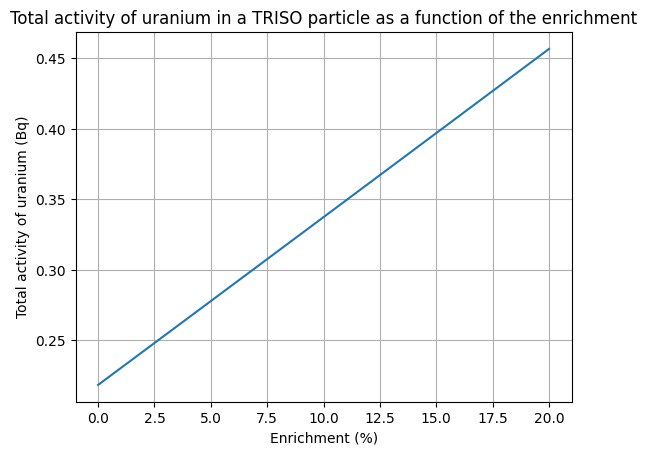

In [28]:
plt.plot(enrichment, total_activity_uranium)

plt.xlabel("Enrichment (%)")
plt.ylabel("Total activity of uranium (Bq)")
plt.title("Total activity of uranium in a TRISO particle as a function of the enrichment")
plt.grid()
plt.show()
